# Tema 2 - Taxi Driver

### Autori: 
* George Muraru


## 2. Scopul temei

Tema are ca scop folosirea unor tehnici simple de reinforcement learning pentru a realiza un bot care "știe" să realizeze o sarcină simplă: să transporte o persoană dintr-o locație în alta.

Mai multe detalii despre joc se pot găsi [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py) și [aici](https://gym.openai.com/envs/Taxi-v3/).

## 3. Workspace Setup

Pentru environmentul de joc, vom folosi "Gym" - un tool oferit de OpenAI pentru Reinforcement Learning.

Mai multe detalii puteți găsi [aici](https://gym.openai.com/).

### Dependețe

In [ ]:
!pip install -U gym

     |████████████████████████████████| 1.6MB 5.3MB/s 
  Created wheel for gym: filename=gym-0.18.0-cp37-none-any.whl size=1656450 sha256=cc708233d2f9ce39c8e560be07faaa28f8121cc179af99f6bc778c7a36009cf6
  Stored in directory: /root/.cache/pip/wheels/be/85/3b/480b828a4a697b37392740a040b8989f729d952b4e441a1877
Successfully built gym
  Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3


### Import biblioteci

In [ ]:
import gym
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set seaborn plotting type
sns.set()


import random
import time
from IPython.display import clear_output

### Setup Environment pentru Taxi

In [ ]:
env = gym.make('Taxi-v3')

### Parametrii

In [ ]:
LOG_INTERVAL = 100 #@param {type: "slider", min: 0, max: 1000, step: 10}
NR_EPISODES = 5000 #@param {type: "slider", min: 5, max: 10000, step: 5}



### Hyperparametrii

In [ ]:
ALPHA = 0.1 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}
GAMMA = 0.9 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}
EPSILON = 0.2 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}

# For BONUS

DECAY_EPS = 0.95 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.05}
DECAY_EPS_EPISODES = 100 #@param {type: "slider", min: 0, max: 10000, step: 5}

## 4 Problemă de rezolvat

Dorim să implementăm un bot care utilizează Q-Learning sau Sarsa pentru a realiza un task simplu - transportarea unei persoane de la o poziție la alta.

De asemenea, dorim să observăm ce se întamplă când modifăm diferiți parametrii ai sistemului:
 - dăm un reward mai mic/mare pentru mișcări inutile
 - scoatem anumite informații din stare


### Choose action (5p)

Funcția `choose_action` are ca parametrii:
- `Q` - tabela de stări-acțiuni/tabelă de utilităti (aceasta se va modifica în pasul de antrenare),
- `state` - starea curentă în care se află jucătorul (în cazul nostru șoferul)
- `eps` - probabilitatea cu care se va alege o mutare random, are rolul de a controla tradeoff-ul dintre *Explorare* și *Exploatare* 

Funcția `choose_action` trebuie să intoarcă o acțiune random cu probabilitate `eps`, altfel acțiunea care maximizează utilitatea din starea curentă.

In [ ]:
def best_action(Q, state) -> int:
  return np.argmax(Q[state])

In [ ]:
def choose_action(Q: np.array, state: int, eps: float = 0.0) -> int:
    # TODO: Select an action
    r = random.random()
    if r > eps:   # select greedy action with probability epsilon
        return best_action(Q, state)
    else:  # otherwise, select an action randomly
        return random.randint(0, 5)

### 4.1 Q-Learning (25p)

Implementați algoritmul Q-Learning.

Formula de update pentru `Q` este:
$$
  Q[s_t, a] = Q[s_t, a] + \alpha(R + \gamma \max_{a}Q[s_{t+1}, a] - Q[s_t, a])
$$

Unde:
- `s_t` - starea la momentul `t`
- `a` - acțiunea aleasă la momentul `t`
- $\alpha$, $\gamma$ - parametru setat înainte de rulare
- `s_{t+1}` - starea la momentul `t+1`, după ce s-a efectua acțiunea `a`

#### Train

In [99]:
REWARDS = []
eps = EPSILON

# Table used to keep the utilities for state-action
Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)

def Qlearning(nr_episodes: int, eps: float, gamma: float, alpha: float, Reward: list, test: bool) -> np.array:
  Q = np.zeros((env.observation_space.n, env.action_space.n))
  for i in range(1, nr_episodes + 1):
      state = env.reset()
      has_ended = False
      total_reward = 0

      while not has_ended:
          # TODO: Get the action
          # action = ...
          action = choose_action(Q, state, eps)
          # Do the action
          next_state, reward, has_ended, _ = env.step(action)

          if test == 1 and reward == -1:
              reward = 0

          # Cumulate the reward for plotting
          total_reward += reward

          # TODO: Update the Q(state, action) with the new value
          # Q[state][action] = ...

          next_best_action = best_action(Q, next_state)
          next_best_reward = Q[next_state][next_best_action]
          
          Q[state][action] += alpha*(reward + gamma * next_best_reward - Q[state][action])
          # TODO: Go to the new state
          # state = ...
          state = next_state

      if i % LOG_INTERVAL == 0:
          Reward.append(total_reward)
          #print(f"Episode: {i}")

      # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
      # Use DECAY_EPS
      if i % DECAY_EPS_EPISODES:
            eps = eps * DECAY_EPS
      
  return Q
# Save the results for plotting
Q_1 = Qlearning(NR_EPISODES, EPSILON, GAMMA, ALPHA, REWARDS, 0)
Q = Q_1
print("Training Q-Learning finished.\n")

Training Q-Learning finished.



#### Let's check the driver

In [100]:
state = env.reset()
has_ended = False


while not has_ended:
    # TODO: Take always the best action
    # action = ...
    action = best_action(Q, state)
    state, reward, has_ended, _ = env.step(action)
    time.sleep(0.75)
    env.render()
    print(f"Reward {reward}")
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward 20


### And the rewards

[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

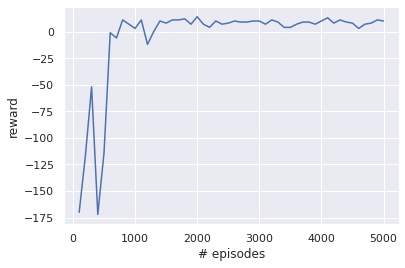

In [101]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

In [102]:
Episodes = np.linspace(2000, 10000, 16,dtype=int)
epsilones = np.linspace(0.1, 1, 10)
gammas = np.linspace(0.1, 1, 10)
alphas = np.linspace(0.1, 1, 10)
Rewards_parametrii_epi = []
Rewards_parametrii_epsi = []
Rewards_parametrii_gammas = []
Rewards_parametrii_alphas = []

for epis in Episodes:
  Rew = []
  Q_act = Qlearning(epis, EPSILON, GAMMA, ALPHA, Rew, 0)
  Rewards_parametrii_epi.append(Rew)

for epsi in epsilones:
  Rew = []
  Q_act = Qlearning(NR_EPISODES+1, epsi, GAMMA, ALPHA, Rew, 0)
  Rewards_parametrii_epsi.append(Rew)

for gamma in gammas:
  Rew = []
  Q_act = Qlearning(NR_EPISODES+1, EPSILON, gamma, ALPHA, Rew, 0)
  Rewards_parametrii_gammas.append(Rew)

for alph in alphas:
  Rew = []
  Q_act = Qlearning(NR_EPISODES+1, EPSILON, GAMMA, alph, Rew, 0)
  Rewards_parametrii_alphas.append(Rew)




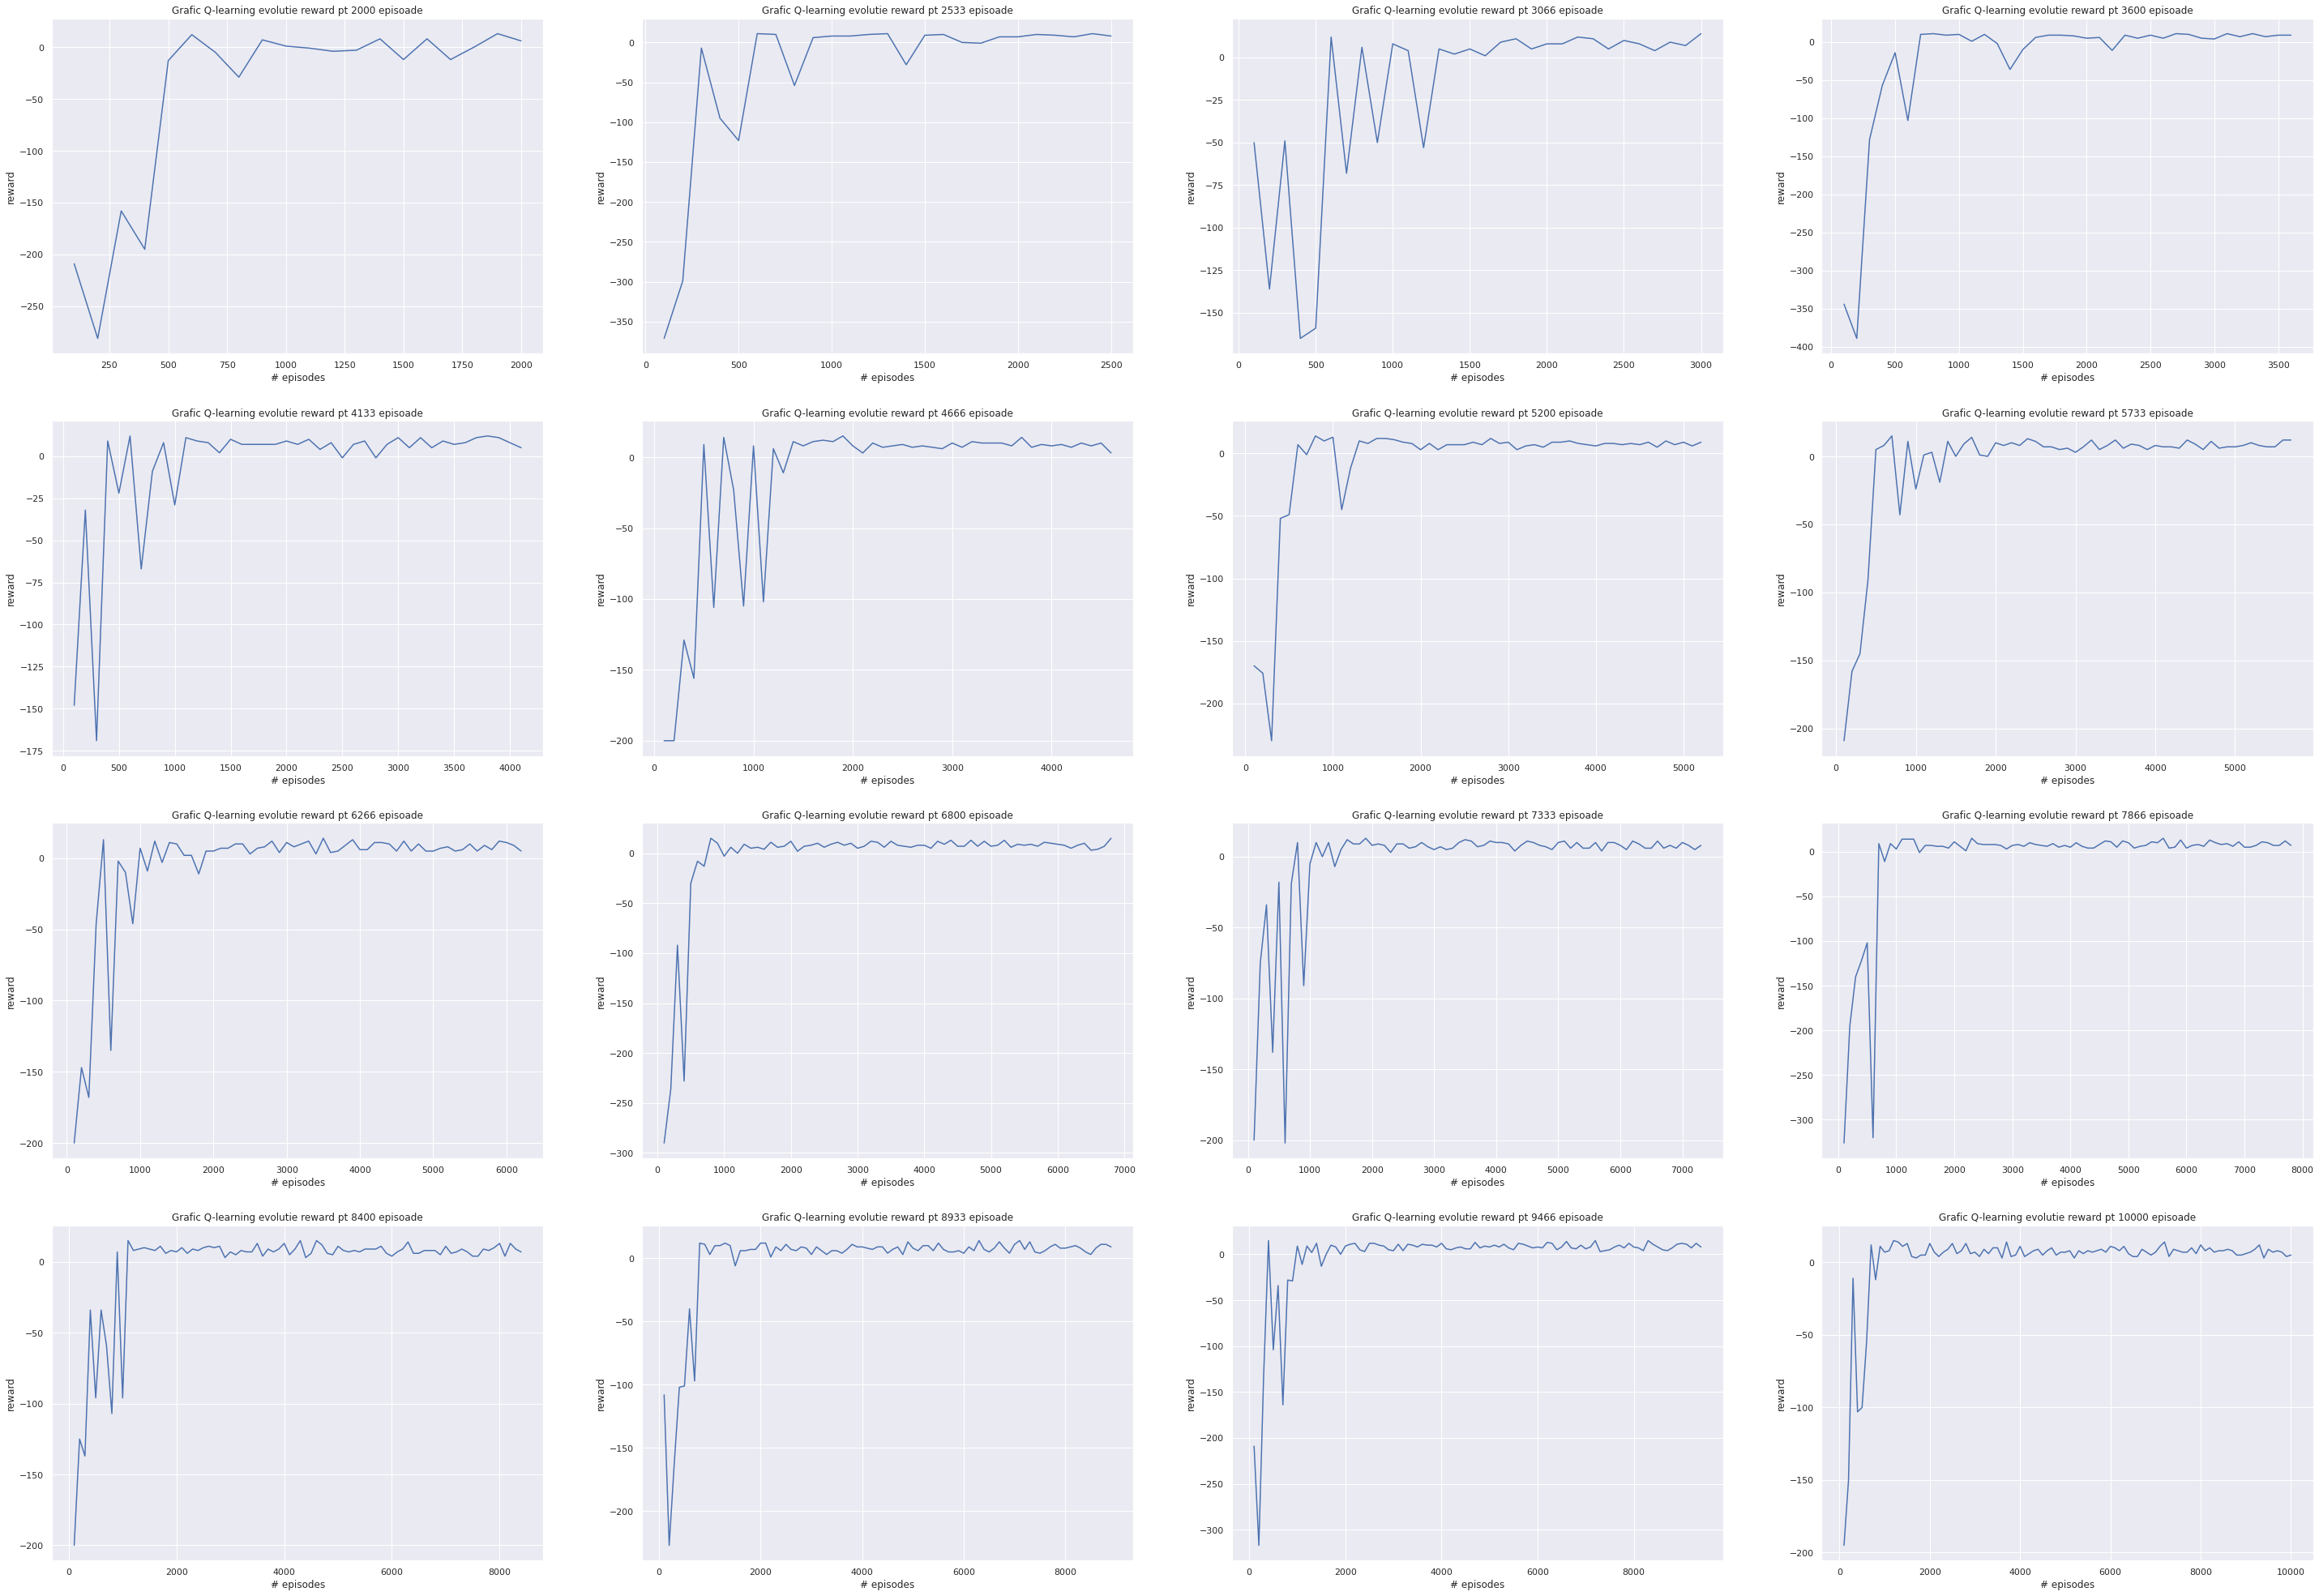

In [103]:
from matplotlib import pyplot as plot
fig, axes = plot.subplots(4, 4, figsize=(50, 35))

poz = 0
for Rew in Rewards_parametrii_epi:
  x_points = np.arange(LOG_INTERVAL, Episodes[poz]+1, LOG_INTERVAL)
  y_points = Rew
  #print(f'{len(x_points)} {len(y_points)}')
  col = int(poz/4)
  lin = int(poz%4)
  plt = sns.lineplot(ax = axes[col, lin], x=x_points, y=y_points)
  axes[col, lin].set_title(f'Grafic Q-learning evolutie reward pt {Episodes[poz]} episoade')
  plt.set(xlabel="# episodes", ylabel="reward")
  poz += 1



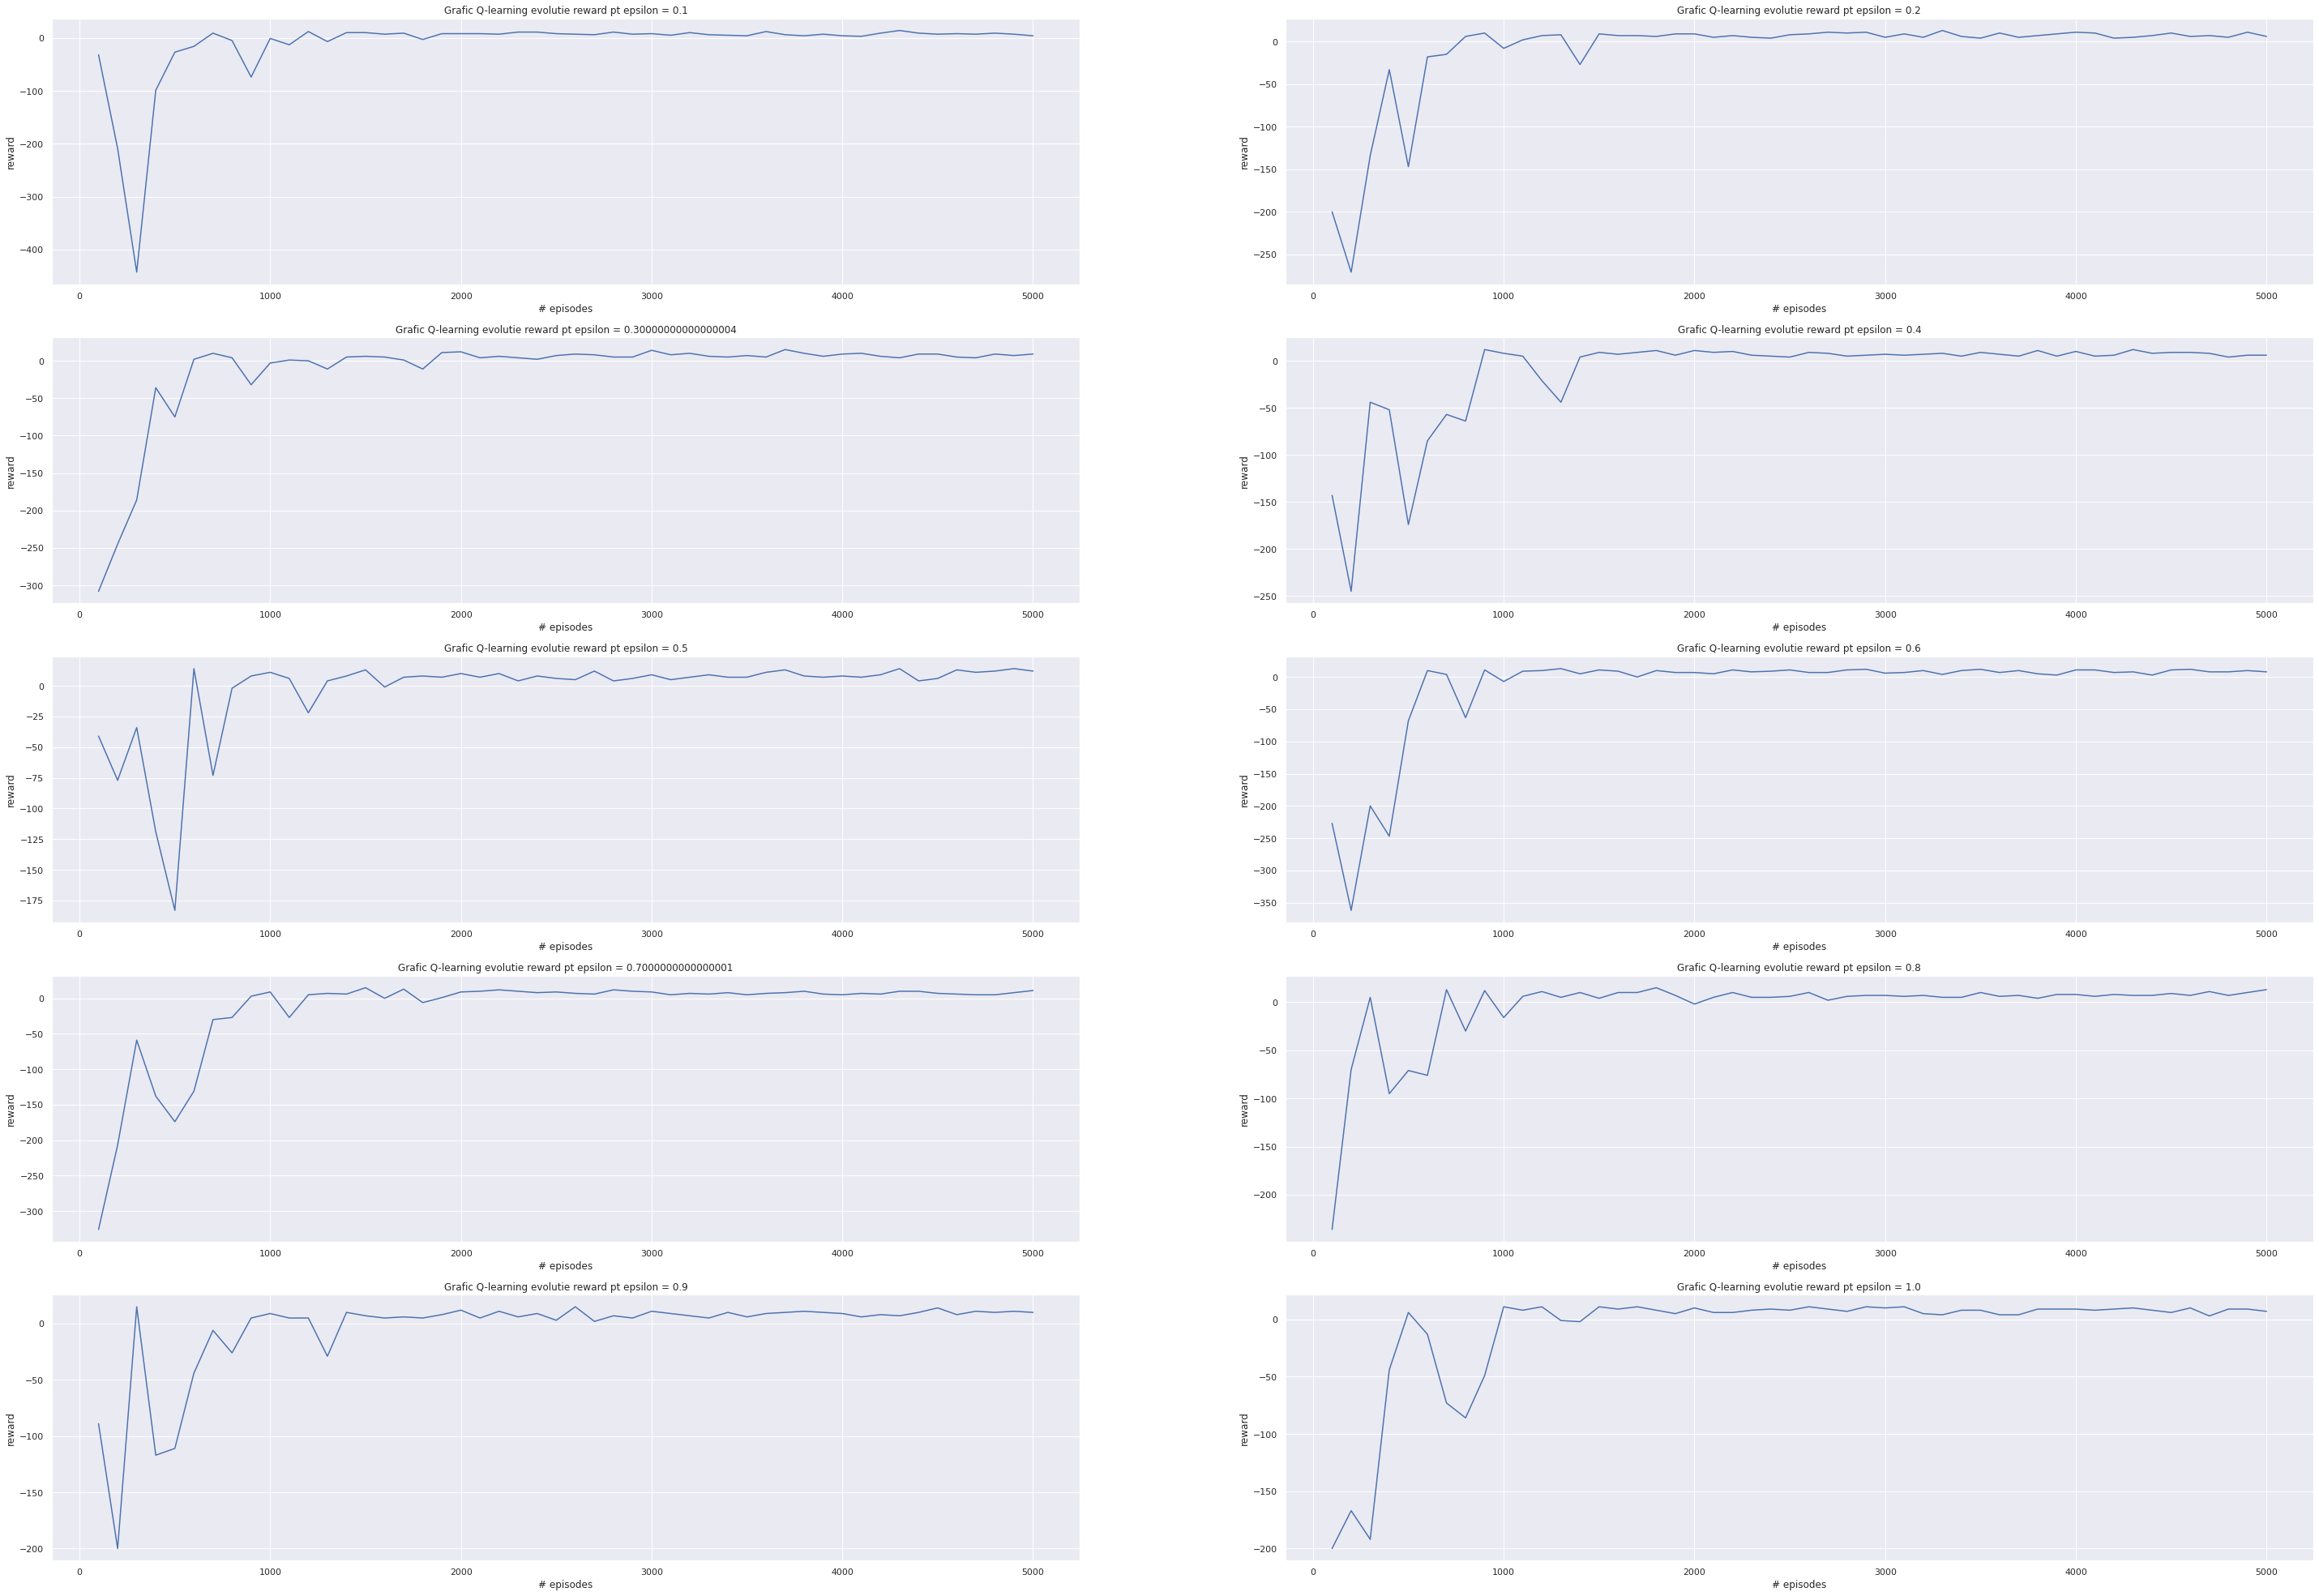

In [104]:
poz = 0
fig, axes = plot.subplots(5, 2, figsize=(50, 35))
for Rew in Rewards_parametrii_epsi:
  
  x_points = np.arange(LOG_INTERVAL, NR_EPISODES+1, LOG_INTERVAL)
  y_points = Rew
  plot.subplot(5, 2, poz+1)
  plt = sns.lineplot(x=x_points, y=y_points)
  plt.set(xlabel="# episodes", ylabel="reward")
  plot.title(f'Grafic Q-learning evolutie reward pt epsilon = {epsilones[poz]}')
  poz += 1

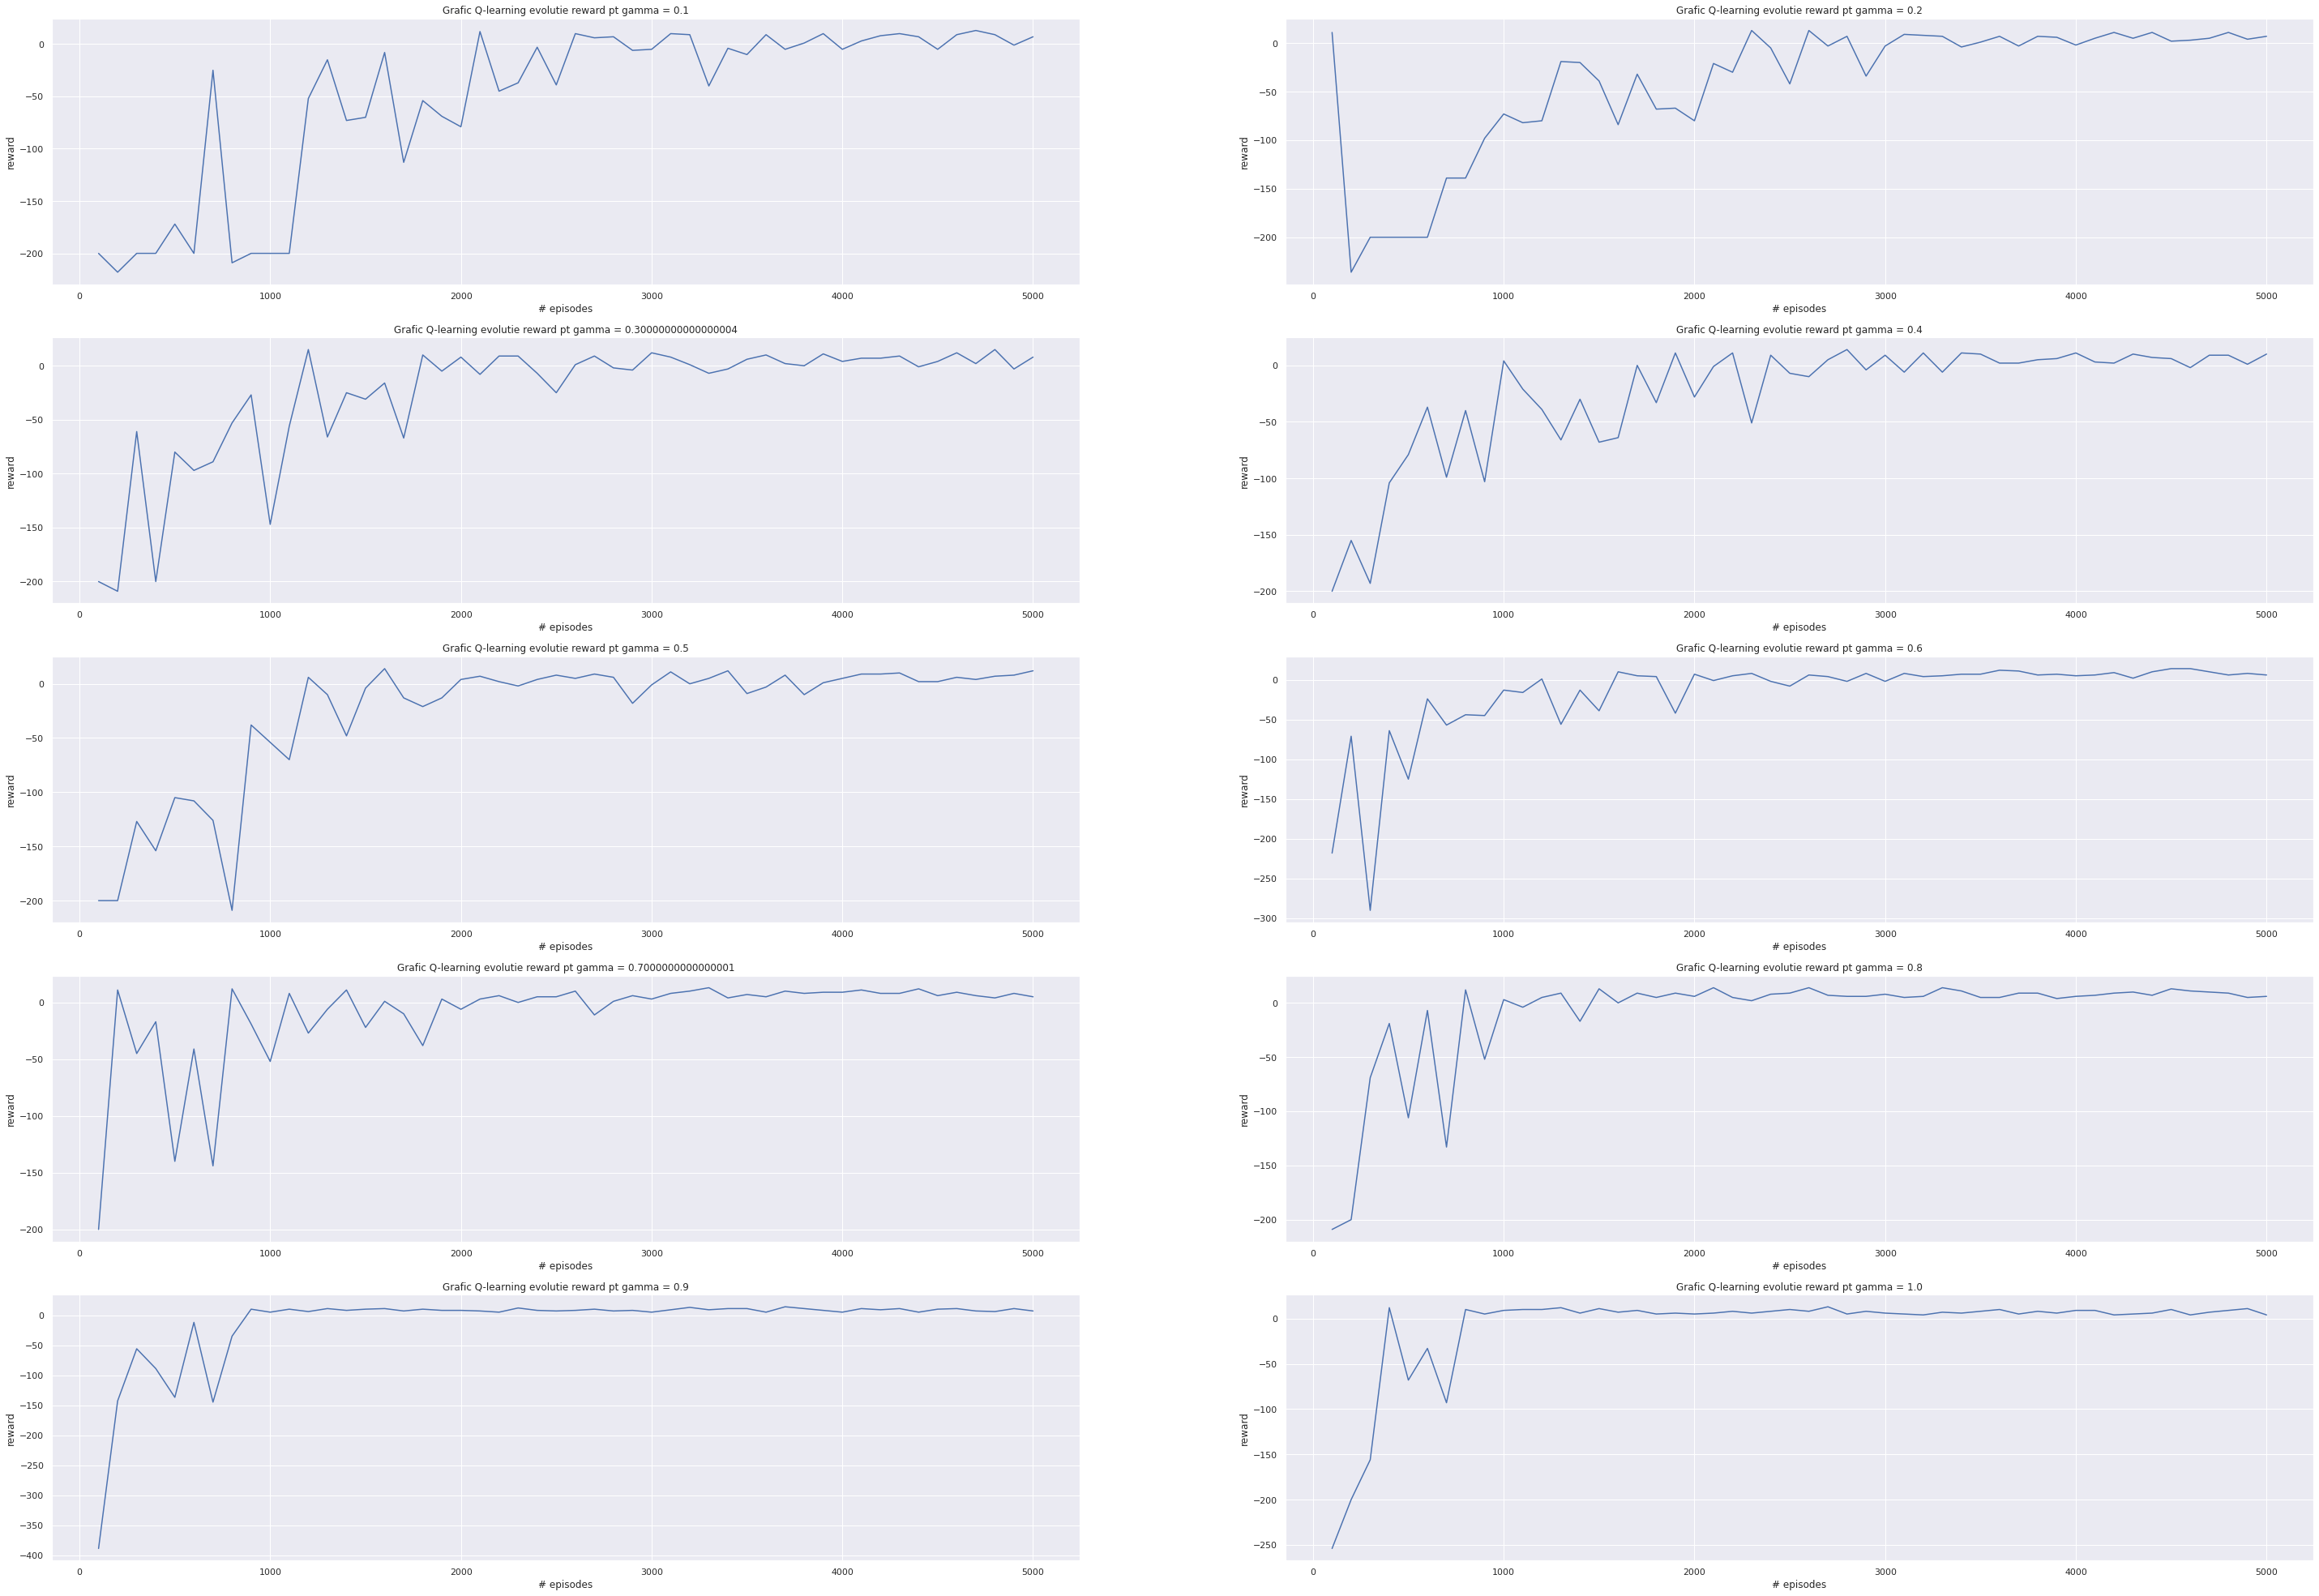

In [105]:
poz = 0
fig, axes = plot.subplots(5, 2, figsize=(50, 35))
for Rew in Rewards_parametrii_gammas:
  
  x_points = np.arange(LOG_INTERVAL, NR_EPISODES+1, LOG_INTERVAL)
  y_points = Rew
  plot.subplot(5, 2, poz+1)
  plt = sns.lineplot(x=x_points, y=y_points)
  plt.set(xlabel="# episodes", ylabel="reward")
  plot.title(f'Grafic Q-learning evolutie reward pt gamma = {gammas[poz]}')
  poz += 1

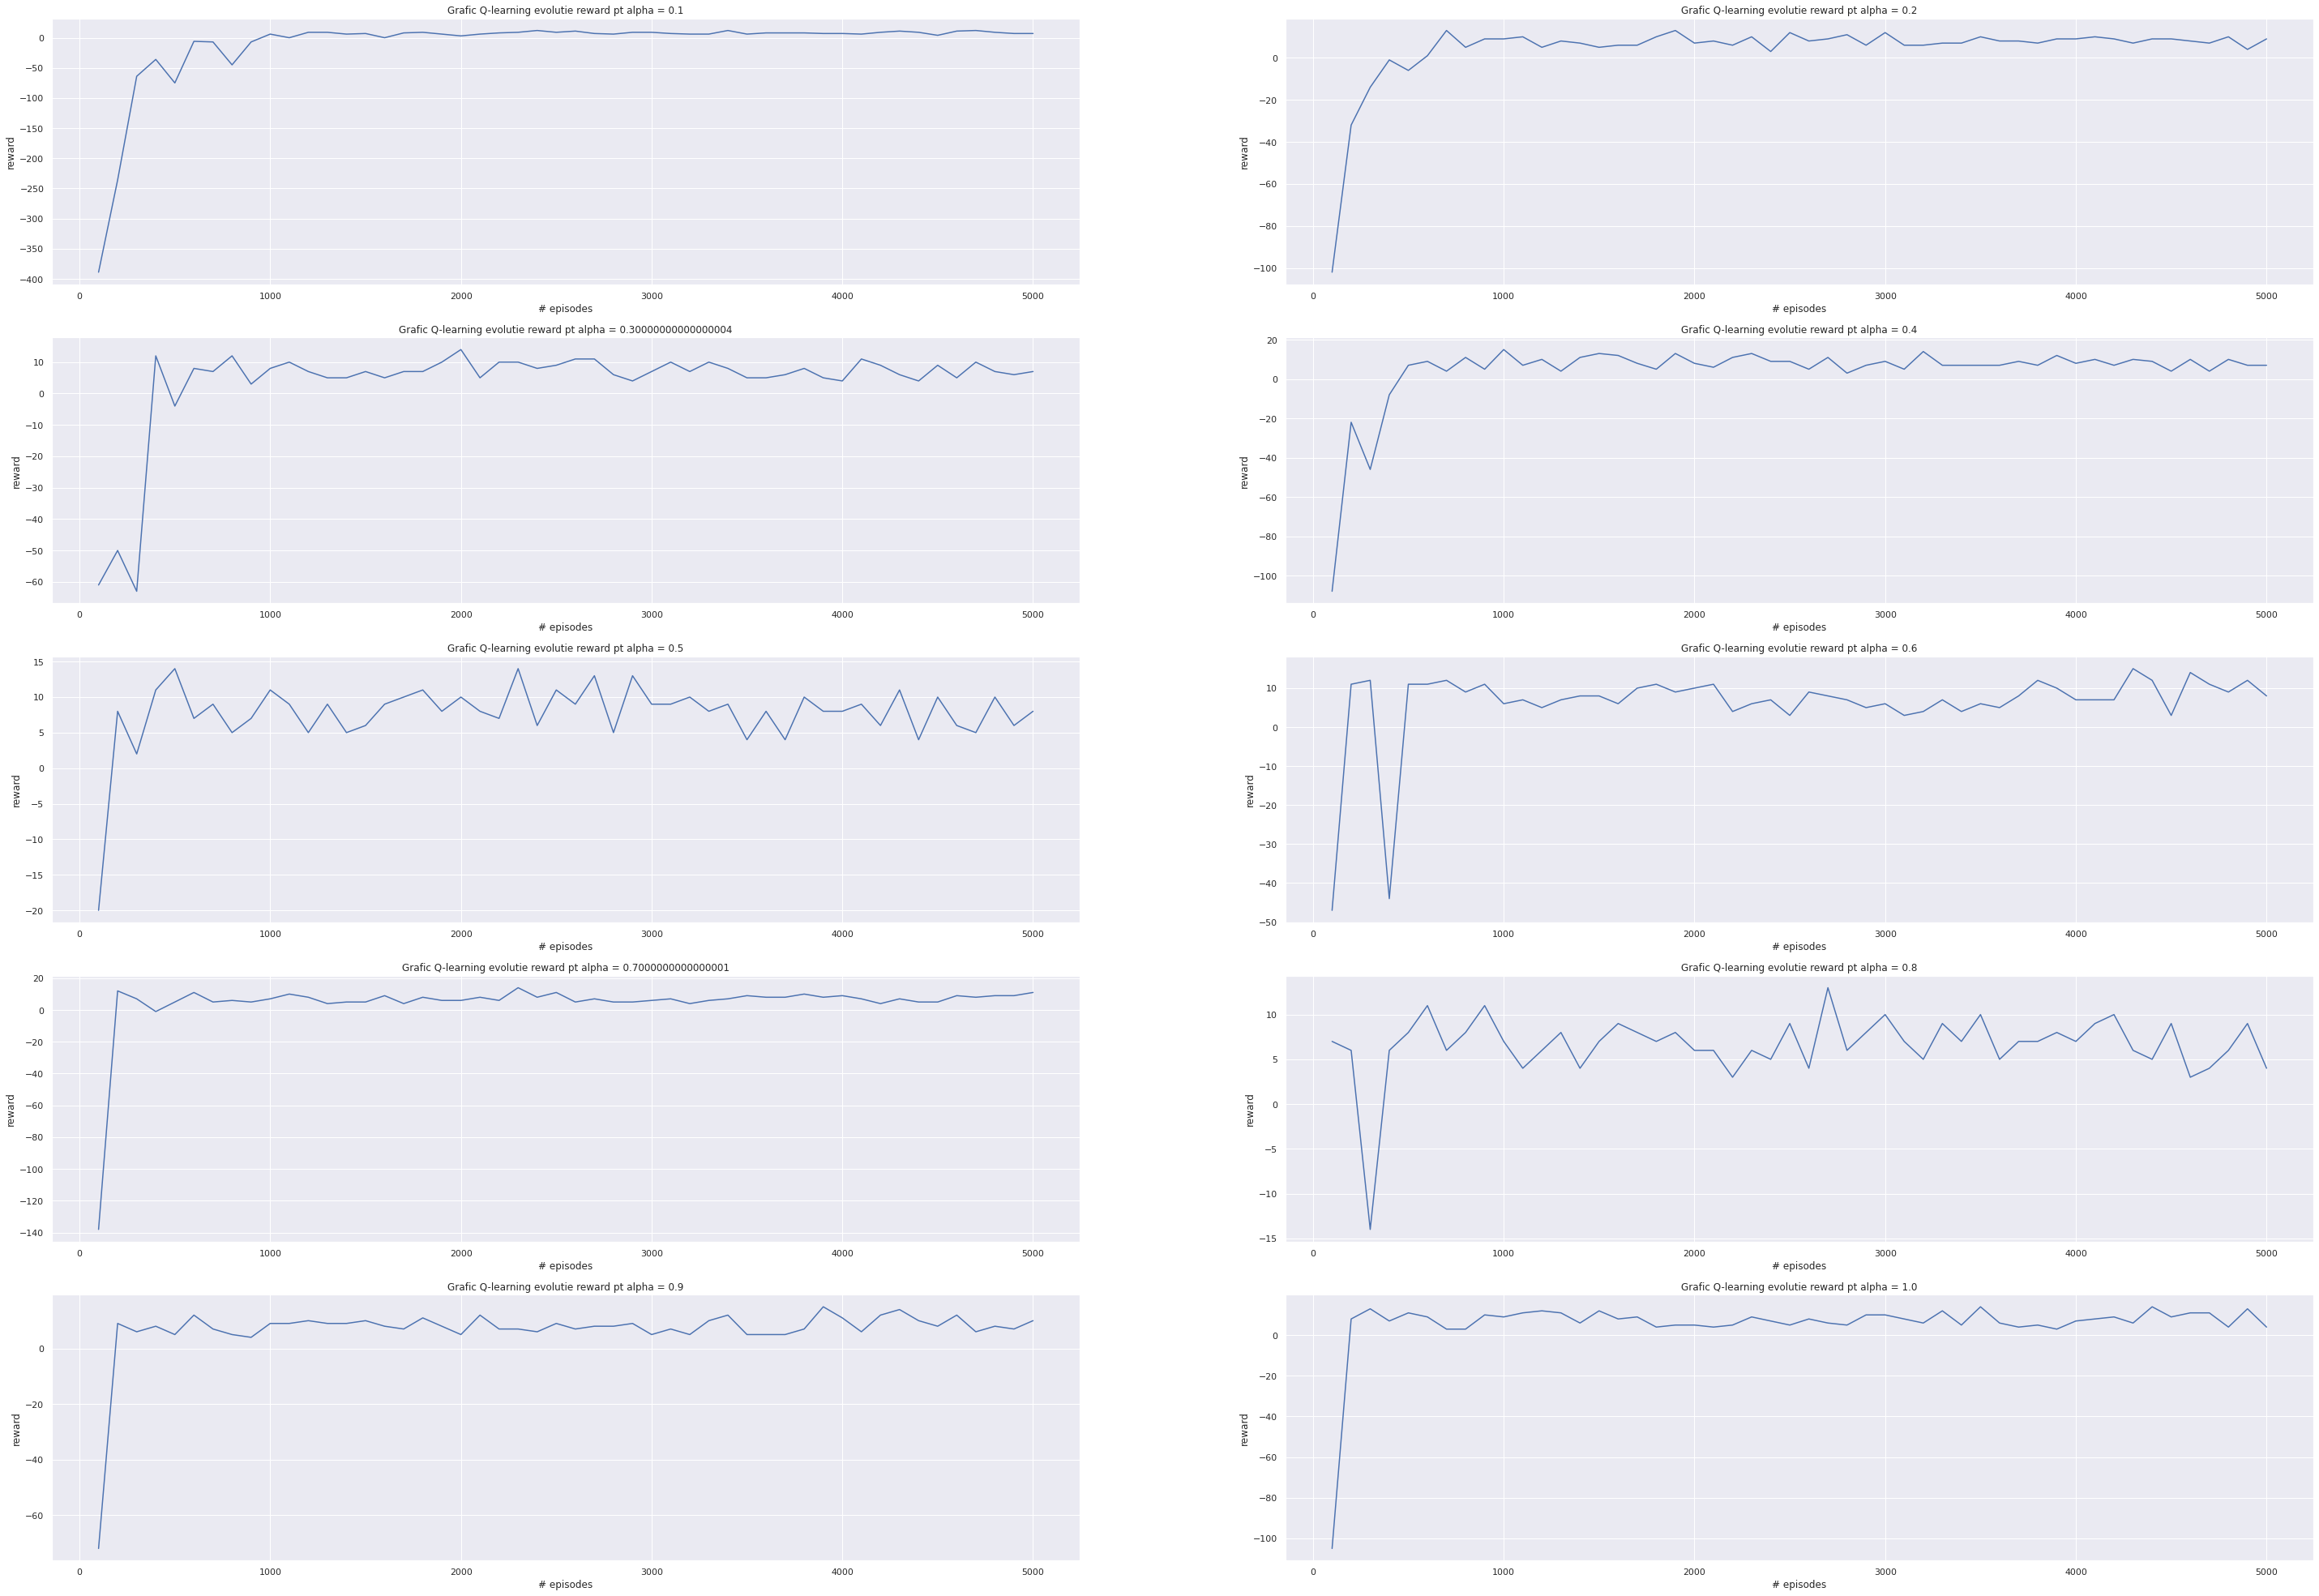

In [106]:
poz = 0
fig, axes = plot.subplots(5, 2, figsize=(50, 35))
for Rew in Rewards_parametrii_alphas:
  
  x_points = np.arange(LOG_INTERVAL, NR_EPISODES+1, LOG_INTERVAL)
  y_points = Rew
  plot.subplot(5, 2, poz+1)
  plt = sns.lineplot(x=x_points, y=y_points)
  plt.set(xlabel="# episodes", ylabel="reward")
  plot.title(f'Grafic Q-learning evolutie reward pt alpha = {alphas[poz]}')
  poz += 1

### 4.2 SARSA (25p)

Implementați algoritmul SARSA.

Formula de update pentru `Q` este:
$$
  Q[s_t, a] = Q[s_t, a] + \alpha(R + \gamma Q[s_{t+1}, a'] - Q[s_t, a])
$$

Unde:
- $s_t$ - starea la momentul `t`
- **a** - acțiunea aleasă la momentul `t`
- **a'** - acțiunea aleasă la momentul `t+1`, presupunând ca suntem în starea $s_{t+1}$
- $\alpha$, $\gamma$ - parametru setat înainte de rulare
- $s_{t+1}$ - starea la momentul `t+1`, după ce s-a efectua acțiunea `a`

### Train

In [107]:
REWARDS = []
eps = EPSILON

Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)

def SARSA (nr_episodes: int, eps: float, gamma: float, alpha: float, Reward: list) -> np.array:
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for i in range(1, nr_episodes + 1):
        state = env.reset()
        has_ended = False
        total_reward = 0

        # TODO: Get the action
        # action = ...
        action = choose_action(Q, state, eps)

        while not has_ended:
            # Do the action
            next_state, reward, has_ended, _ = env.step(action)
            
            # TODO: Get the next_action from the next_state
            # next_action = ...
            next_action = choose_action(Q, next_state, eps)
            # Cumulate the reward for plotting
            total_reward += reward

            # TODO: Update the Q(state, action) with the new value
            # Q[state][action] = ...
            next_reward = Q[next_state][next_action]
            
            Q[state][action] += alpha*(reward + gamma * next_reward - Q[state][action])
            # TODO: Go to the new state
            # state = ...
            state = next_state
            # TODO: Update the action
            # action = ...
            action = next_action

        if i % LOG_INTERVAL == 0:
            Reward.append(total_reward)
            #print(f"Episode: {i}")

        # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
        # Use DECAY_EPS
        if i % DECAY_EPS_EPISODES:
            eps = eps * DECAY_EPS
    return Q

# Save for plotting

Q_2 = SARSA(NR_EPISODES, EPSILON, GAMMA, ALPHA, REWARDS)
Q = Q_2
print("Training SARSA finished.\n")

Training SARSA finished.



#### Let's check the driver

In [108]:

state = env.reset()
has_ended = False


while not has_ended:
    # TODO: Take always the best action
    # action = ...
    action = best_action(Q, state)
    state, reward, has_ended, _ = env.step(action)
    time.sleep(0.75)
    env.render()
    print(f"Reward {reward}")
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward 20


#### And the rewards

[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

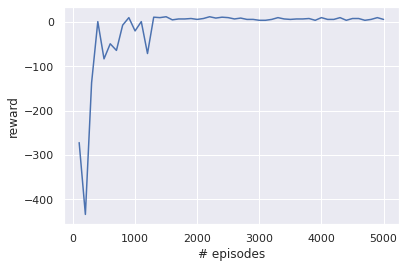

In [109]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

In [110]:
Rewards_parametrii_epi = []
Rewards_parametrii_epsi = []
Rewards_parametrii_gammas = []
Rewards_parametrii_alphas = []

for epis in Episodes:
  Rew = []
  Q_act = SARSA(epis, EPSILON, GAMMA, ALPHA, Rew)
  Rewards_parametrii_epi.append(Rew)

for epsi in epsilones:
  Rew = []
  Q_act = SARSA(NR_EPISODES+1, epsi, GAMMA, ALPHA, Rew)
  Rewards_parametrii_epsi.append(Rew)

for gamma in gammas:
  Rew = []
  Q_act = SARSA(NR_EPISODES+1, EPSILON, gamma, ALPHA, Rew)
  Rewards_parametrii_gammas.append(Rew)

for alph in alphas:
  Rew = []
  Q_act = SARSA(NR_EPISODES+1, EPSILON, GAMMA, alph, Rew)
  Rewards_parametrii_alphas.append(Rew)

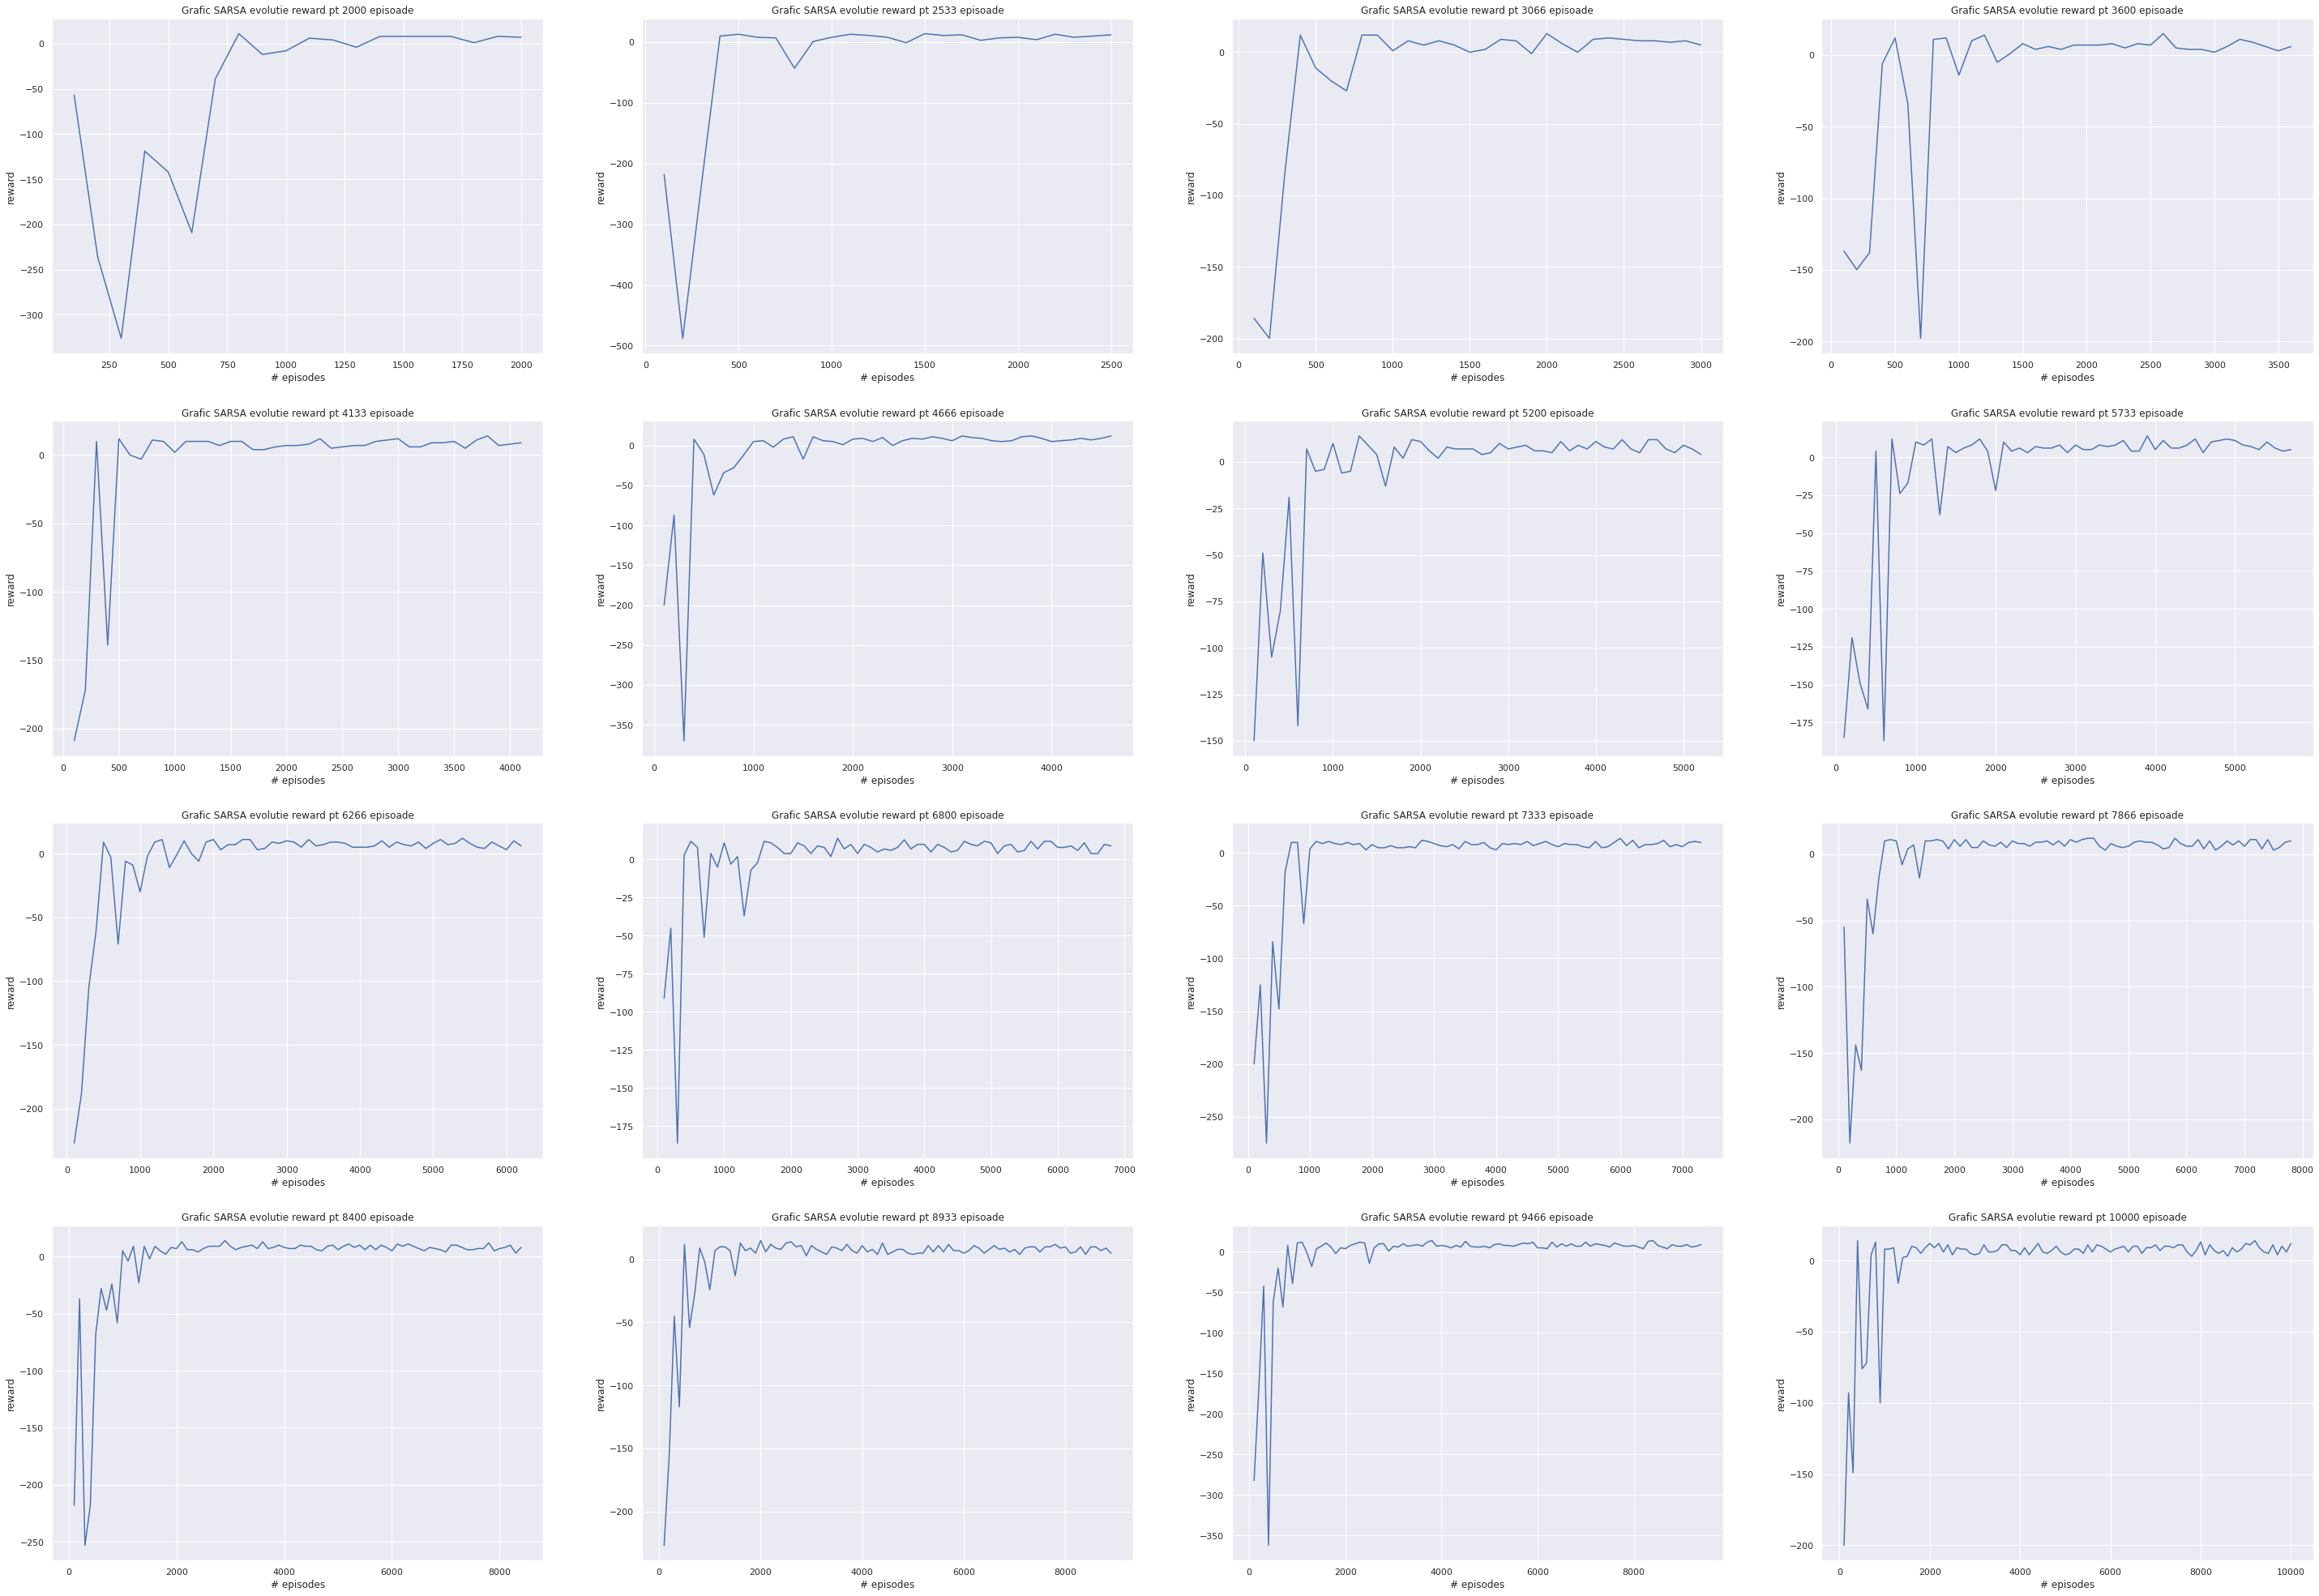

In [111]:
from matplotlib import pyplot as plot
fig, axes = plot.subplots(4, 4, figsize=(50, 35))

poz = 0
for Rew in Rewards_parametrii_epi:
  x_points = np.arange(LOG_INTERVAL, Episodes[poz]+1, LOG_INTERVAL)
  y_points = Rew
  #print(f'{len(x_points)} {len(y_points)}')
  col = int(poz/4)
  lin = int(poz%4)
  plt = sns.lineplot(ax = axes[col, lin], x=x_points, y=y_points)
  axes[col, lin].set_title(f'Grafic SARSA evolutie reward pt {Episodes[poz]} episoade')
  plt.set(xlabel="# episodes", ylabel="reward")
  poz += 1


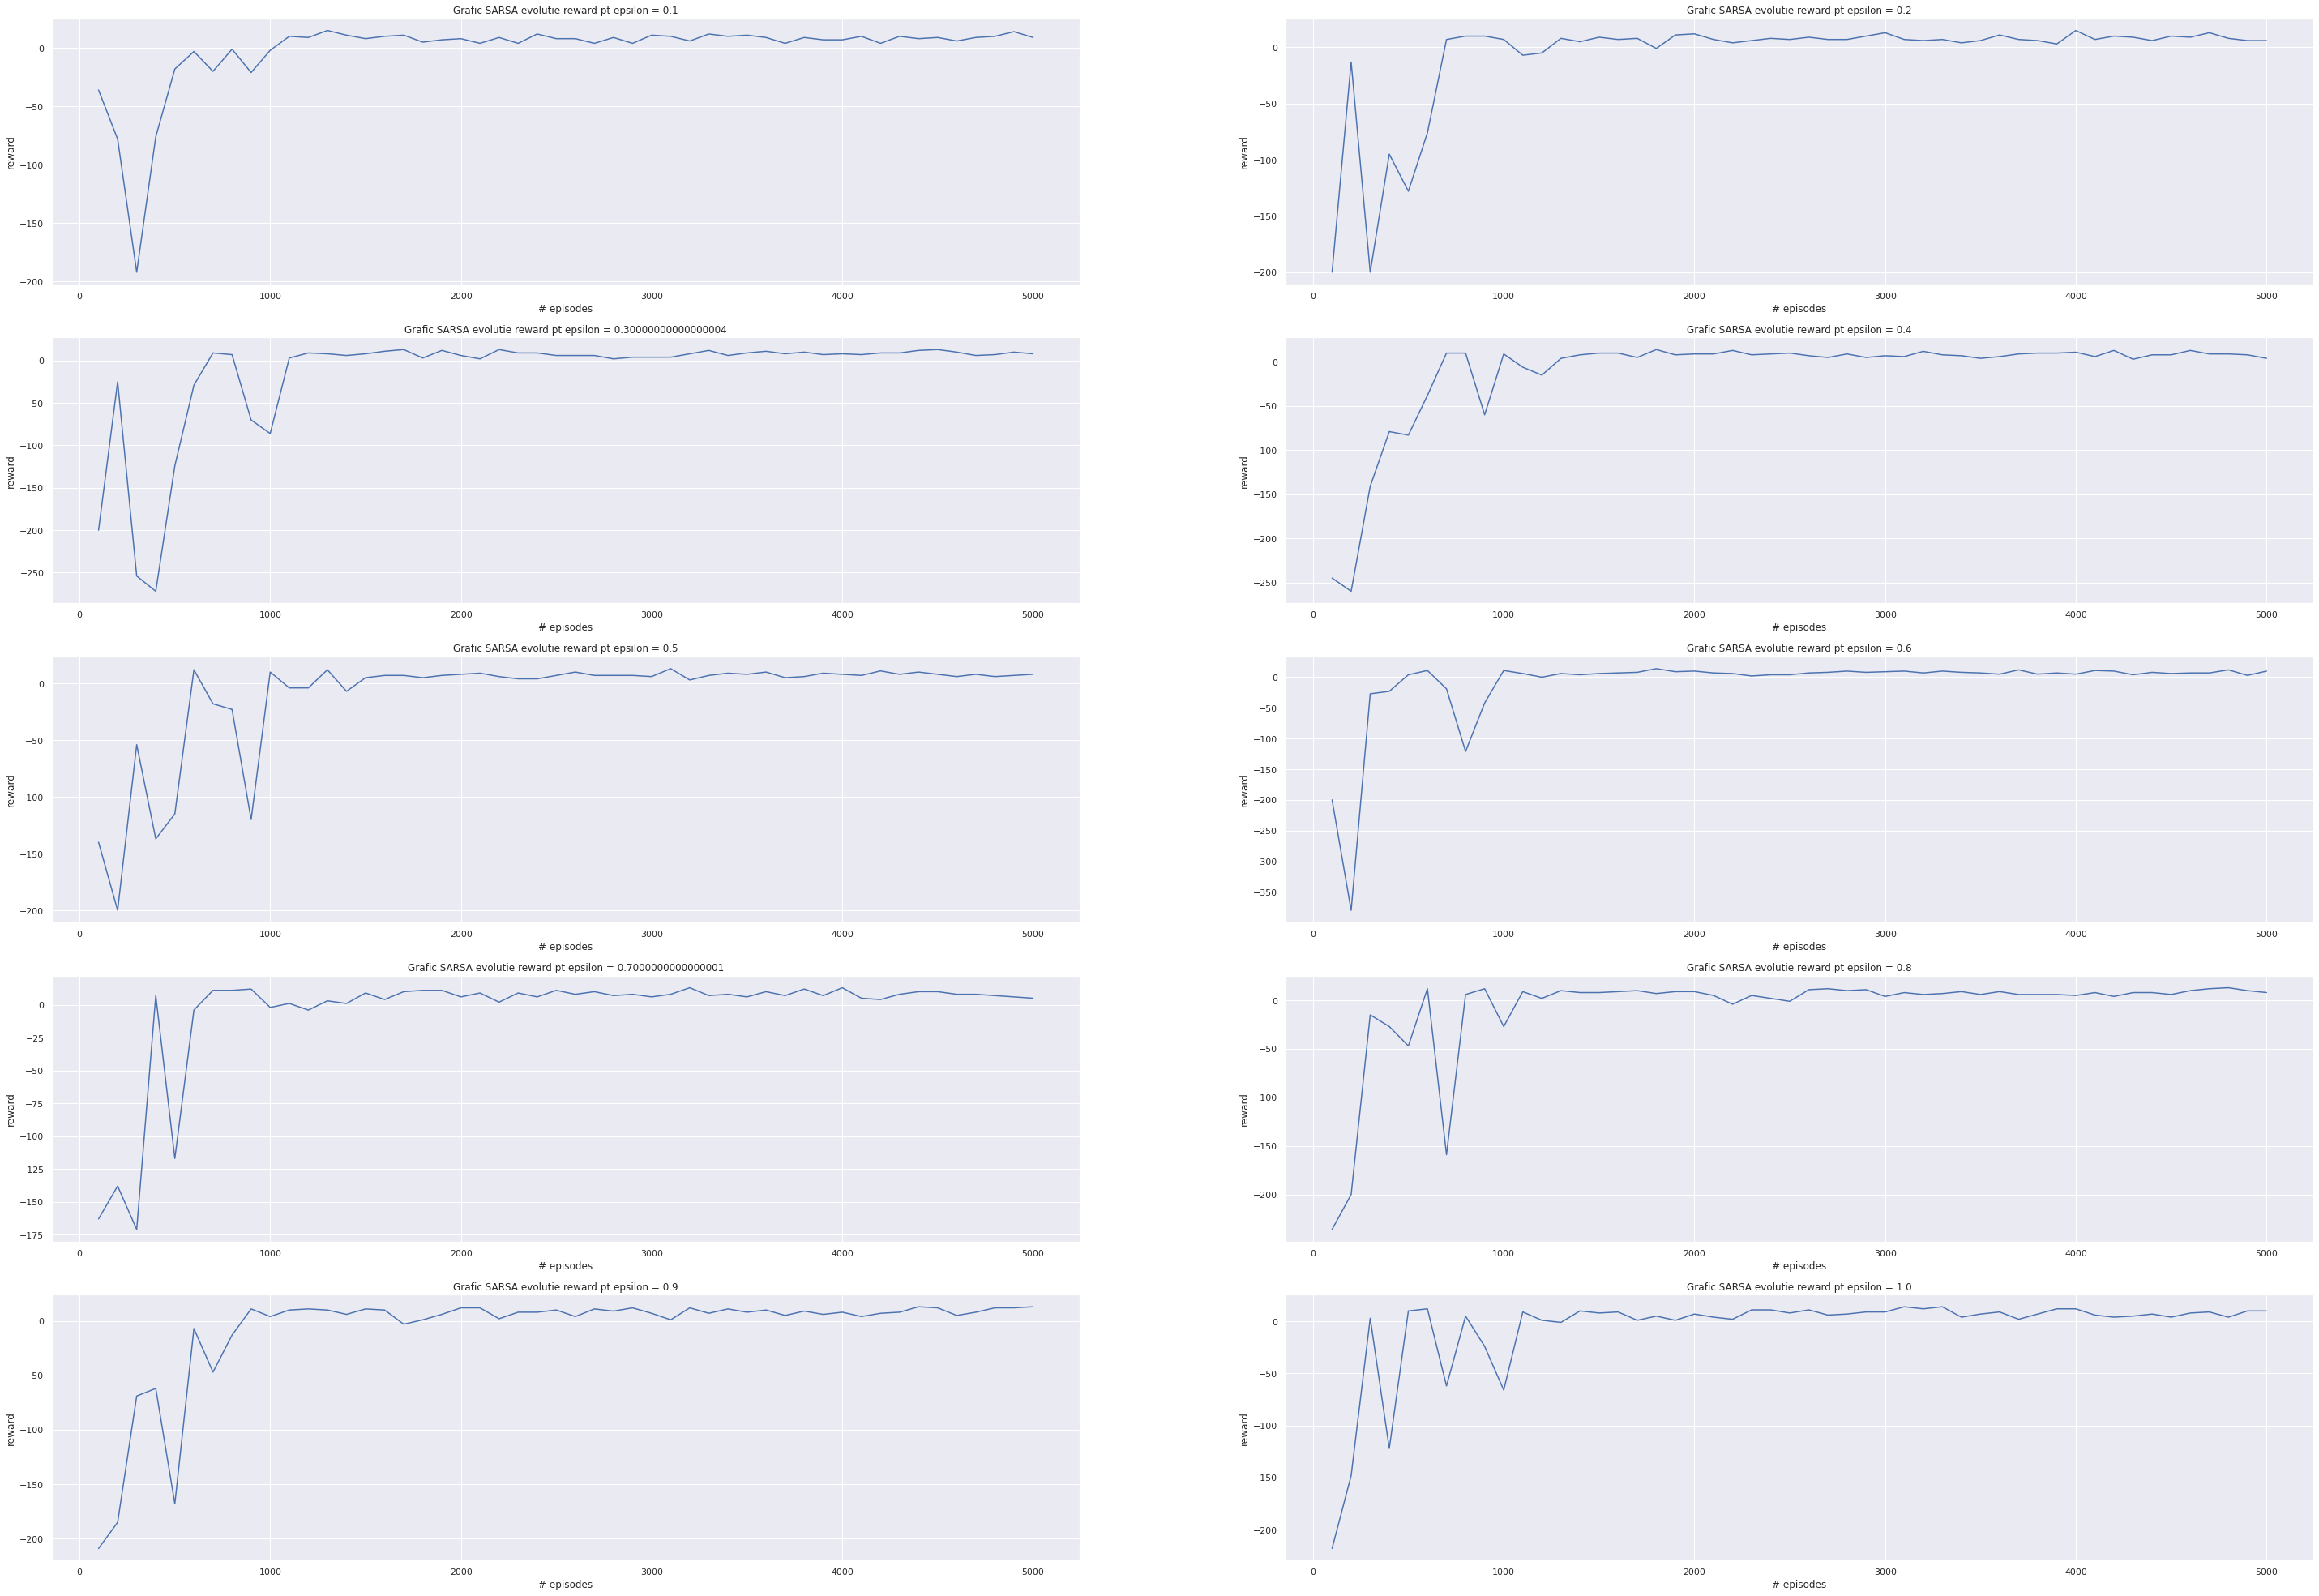

In [112]:
poz = 0
fig, axes = plot.subplots(5, 2, figsize=(50, 35))
for Rew in Rewards_parametrii_epsi:
  
  x_points = np.arange(LOG_INTERVAL, NR_EPISODES+1, LOG_INTERVAL)
  y_points = Rew
  plot.subplot(5, 2, poz+1)
  plt = sns.lineplot(x=x_points, y=y_points)
  plt.set(xlabel="# episodes", ylabel="reward")
  plot.title(f'Grafic SARSA evolutie reward pt epsilon = {epsilones[poz]}')
  poz += 1

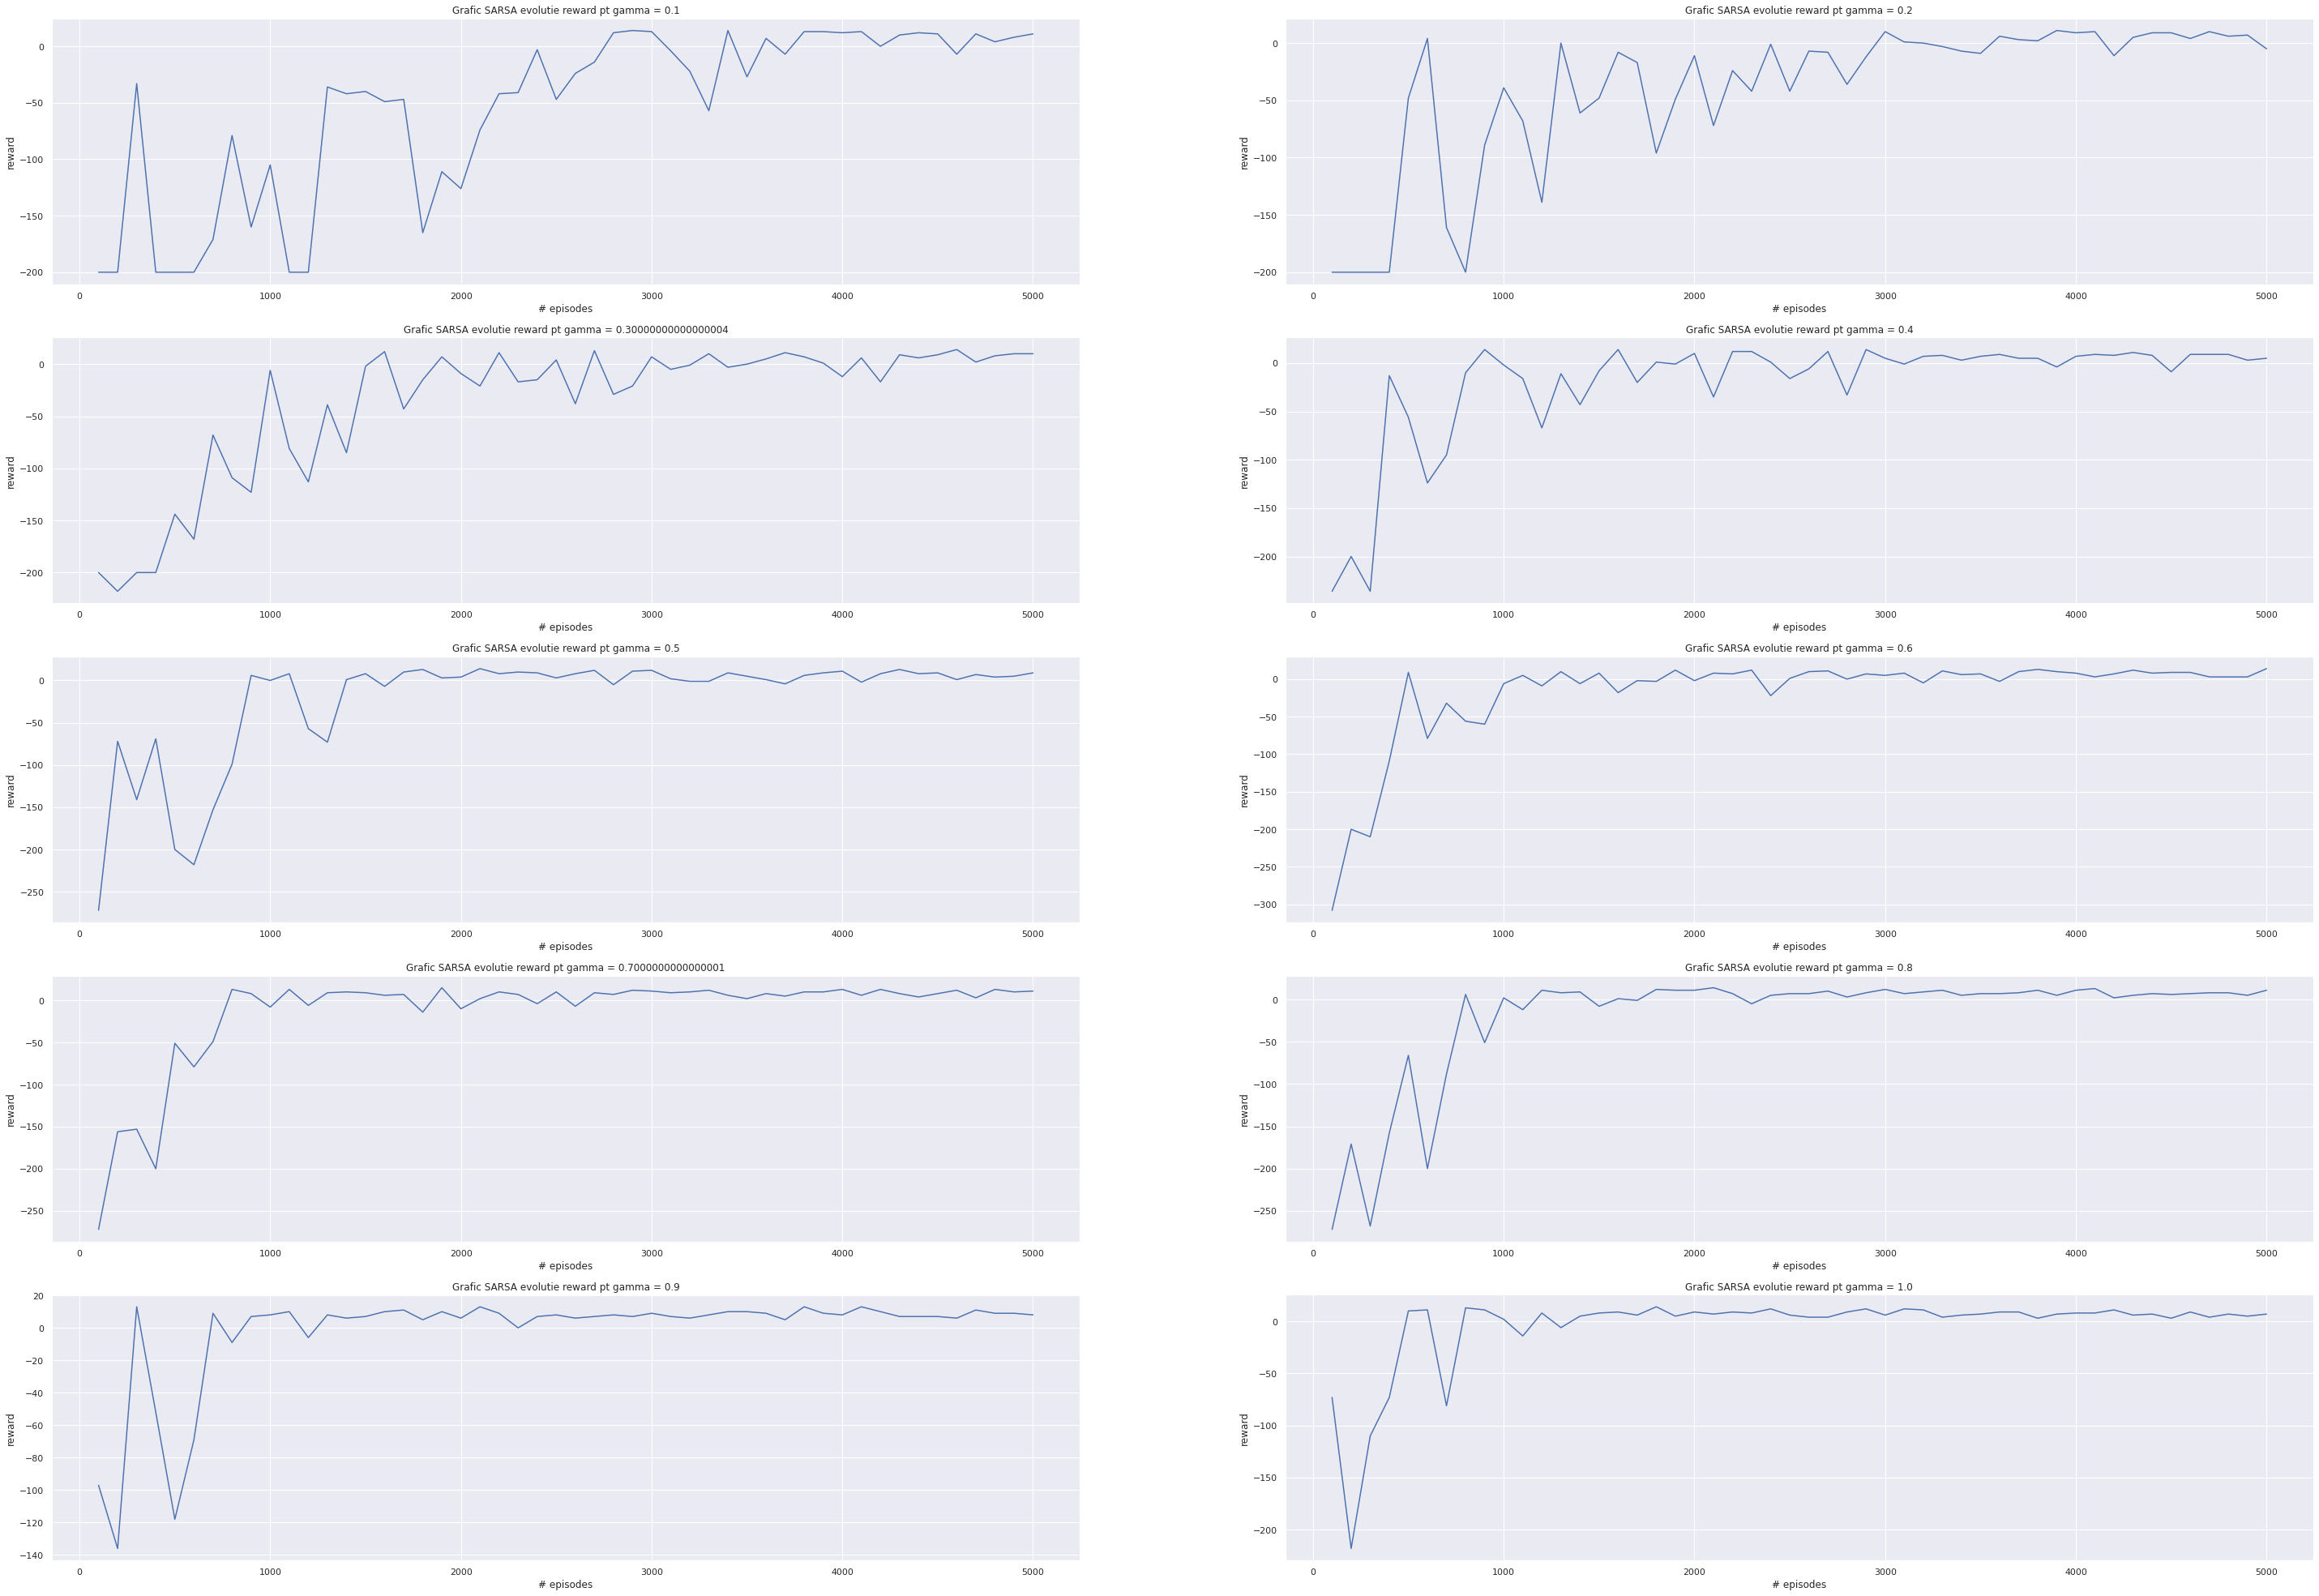

In [113]:
poz = 0
fig, axes = plot.subplots(5, 2, figsize=(50, 35))
for Rew in Rewards_parametrii_gammas:
  
  x_points = np.arange(LOG_INTERVAL, NR_EPISODES+1, LOG_INTERVAL)
  y_points = Rew
  plot.subplot(5, 2, poz+1)
  plt = sns.lineplot(x=x_points, y=y_points)
  plt.set(xlabel="# episodes", ylabel="reward")
  plot.title(f'Grafic SARSA evolutie reward pt gamma = {gammas[poz]}')
  poz += 1

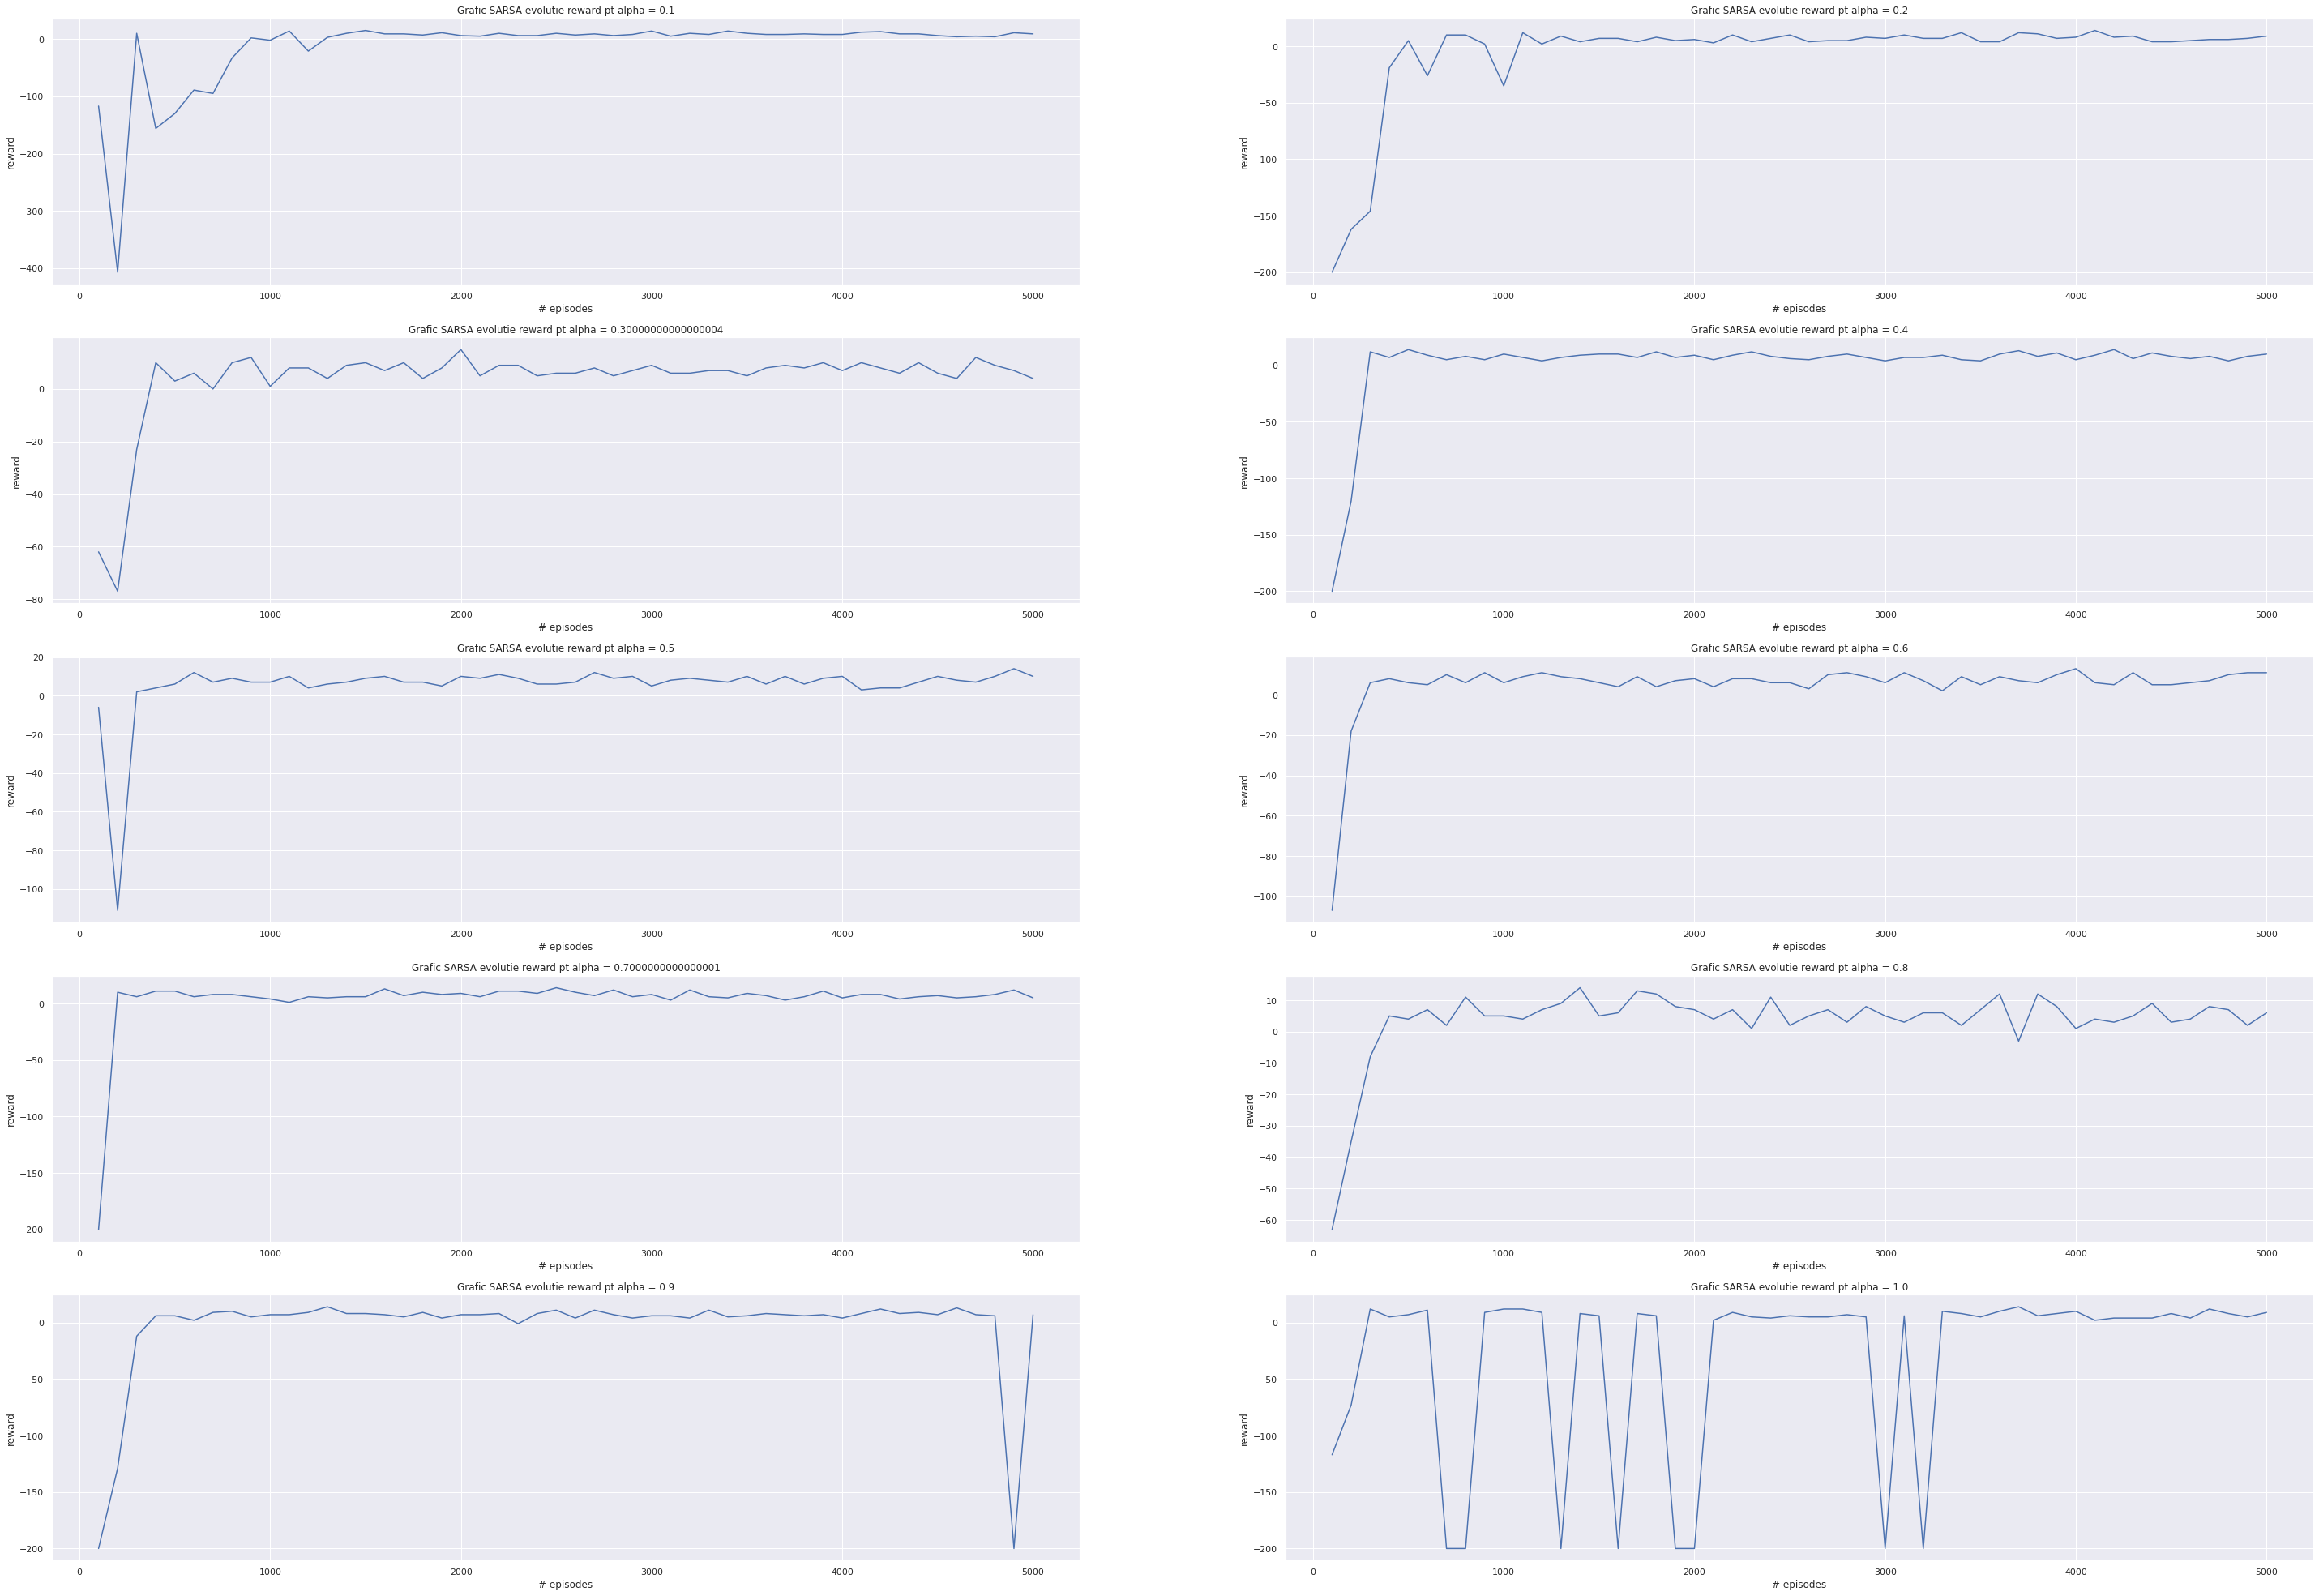

In [114]:
poz = 0
fig, axes = plot.subplots(5, 2, figsize=(50, 35))
for Rew in Rewards_parametrii_alphas:
  
  x_points = np.arange(LOG_INTERVAL, NR_EPISODES+1, LOG_INTERVAL)
  y_points = Rew
  plot.subplot(5, 2, poz+1)
  plt = sns.lineplot(x=x_points, y=y_points)
  plt.set(xlabel="# episodes", ylabel="reward")
  plot.title(f'Grafic SARSA evolutie reward pt alpha = {alphas[poz]}')
  poz += 1

### 4.3 Results (35p)



Modificați parametrii algoritmilor (cele de la începutul Notebook-ului), faceți grafice pentru fiecare caz și explicați rezultatele obținute.

Unii (și nu numai) dintre paramatrii pe care îi puteți modifica:
- numărul de episoade de antrenare
- `eps` mai mic/mare
- valoarea lui $\gamma$
- valoarea lui $\alpha$


#### 4.4 And something more... (10p)

##### A simple move (5p)


Dorim să vedem importanța reward-ului și a stării.

Modificați celula de antrenare pentru una dintre metode astfel încât reward-ul pentru o **mutare simplă** să fie 0, (acum este -1). Refaceți graficul metodei alese și trageți concluziile.


##### A little less space (5p)

**Starea** are valori discrete (500 de valori posibile), iar aceasta este encodată folosind metoda d [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py#L128).

Rescrieți codul astfel încât starea să fie encodată folosind:
$$
(((taxi\_row * 5) + taxi\_column) * 5 + pass\_loc) * 2 + destination
$$
Antrenați unul dintre algoritmi, faceți graficul și explicați rezultatul.

**Atenție!** Trebuie să și modificați cum arată Q (forma matricei).

Hint: Decodarea stării este [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py#L139)


## 5 BONUS: Some decay on the way (10p)

Analizați ce se întâmplă daca scadeți treptat `eps`, pe măsura antrenării. 

Intuitiv, dorim ca la începutul antrenării agentul să **exploreze** cât mai mult posibil și să atingă un număr mare de stări (în exemplul nostru cu taxiul, nu avem așa multe stări, dar sunt jocuri în care spațiul stărilor poate fi mai mare).

De asemenea, pe măsură ce continuăm antrenarea, dorim ca taximetristul să înceapă să **exploateze** mai mult stările cunoscute cu o utilitate mare.

